In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [17]:
def compareAlgorithmsForBarChart(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [18]:
def barChart(results, score, string):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'NB', 'MLP', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects = ax.bar(x , results, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.legend()
    # annotate bars
    ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f')

    fig.tight_layout()
    
    

    # save plot
    fileName = string +'.png'
    print(fileName)
    plt.savefig('figures/benchmark/' + fileName)
    
    plt.show()


In [19]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibGDMDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [20]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [21]:
precision_results, recall_results, auc_results, f05_results, names = compareAlgorithmsForBarChart(X_train,y_train)

[0.6046464646464648]
[0.41428571428571426]
[0.8854704163198948]
[0.5530779054916986]
[0.6046464646464648, 0.8]
[0.41428571428571426, 0.07142857142857142]
[0.8854704163198948, 0.8186192347146148]
[0.5530779054916986, 0.2575757575757575]
[0.6046464646464648, 0.8, 0.5472727272727272]
[0.41428571428571426, 0.07142857142857142, 0.38571428571428573]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103]
[0.5530779054916986, 0.2575757575757575, 0.508574959831912]
[0.6046464646464648, 0.8, 0.5472727272727272, 0.13159319672635944]
[0.41428571428571426, 0.07142857142857142, 0.38571428571428573, 0.9]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103, 0.7771957922852112]
[0.5530779054916986, 0.2575757575757575, 0.508574959831912, 0.15707843513956415]
[0.6046464646464648, 0.8, 0.5472727272727272, 0.13159319672635944, 0.40981240981240974]
[0.41428571428571426, 0.07142857142857142, 0.38571428571428573, 0.9, 0.34285714285714286]
[0.8854704163198948, 0.8186192347146148, 0.883952039019103,

benchmark_precision.png


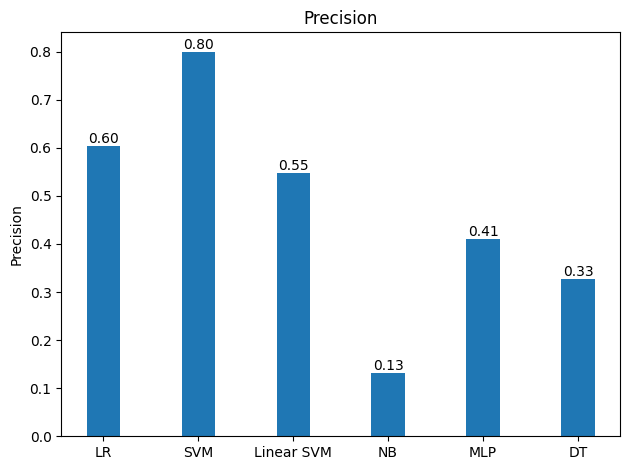

benchmark_recall.png


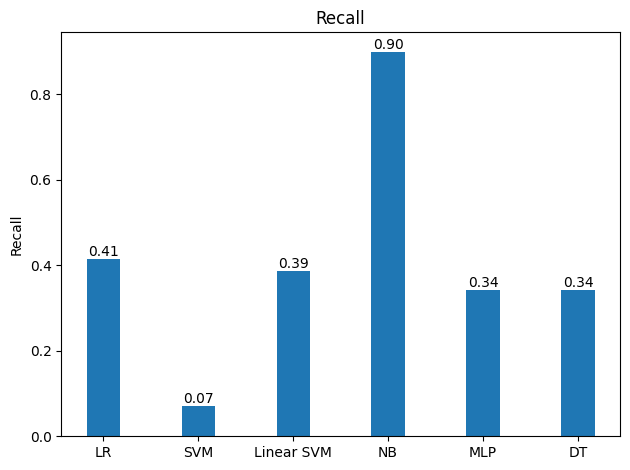

benchmark_auc.png


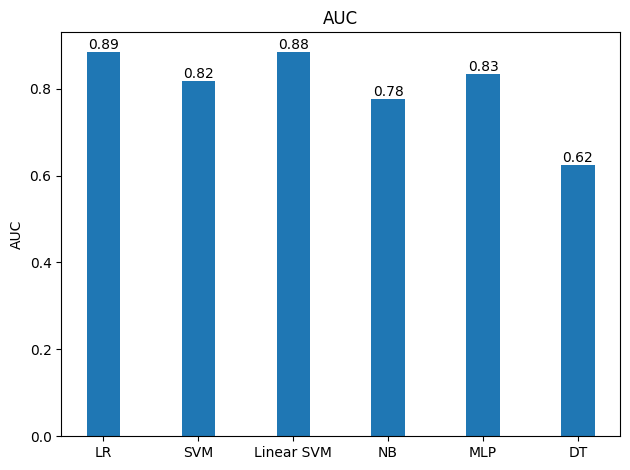

benchmark_f05.png


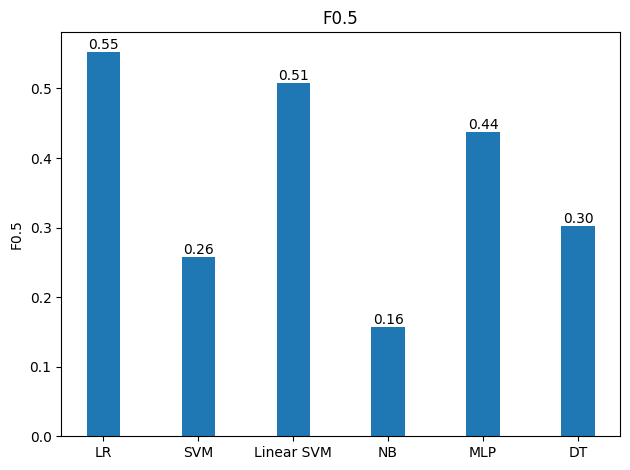

In [22]:
barChart(precision_results, "Precision", "benchmark_precision")
barChart(recall_results, "Recall", "benchmark_recall")
barChart(auc_results, "AUC", "benchmark_auc")
barChart(f05_results, "F0.5", "benchmark_f05")

In [23]:

# baseline
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs')

# fit the model
log = LogisticRegression(solver='lbfgs')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

# evaluate predictions
evaluate_model(y_test, y_pred)

NameError: name 'evaluate_model' is not defined

In [ ]:
# compare between GDM BiB dataset results and all BiB dataset results
# seems like similar precision, better recall and F0.5 scores with GDM only dataset despite GDM dataset being smaller. 
# However less imbalance, GDM is highliy associated with LGA, this association may lead to better predicitons?